<a href="https://colab.research.google.com/github/SKawsar/Data_Visualization_with_Python_s2/blob/main/Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization and analysis 

Name: Mahbubur Rahman


In [23]:
# required library for data analysis
import pandas as pd
import numpy as np

# required librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

#### Loading the dataset

In [24]:
df = pd.read_csv("ford.csv")

display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


#### create pie plot

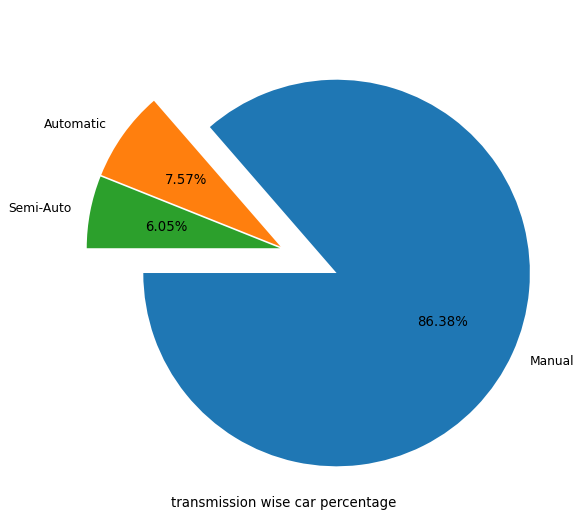

In [25]:
# data = [35, 21, 29, 39, 11]
explode = [0.3,0.02,0.02]
# df_label=df.columns.values[3]
plt.figure(figsize=(15, 8), dpi=80)
df['transmission'].value_counts().plot(kind="pie", autopct='%1.2f%%', explode=explode, startangle=180)
plt.ylabel("")
plt.xlabel("transmission wise car percentage")
plt.show()

As the number of categorical value is only three, pie plot is suitable for visualization. if the cariable increases, informatino and verbocity increases in the plot. 

### Create Bar plot

<AxesSubplot:xlabel='transmission_type', ylabel='percentage'>

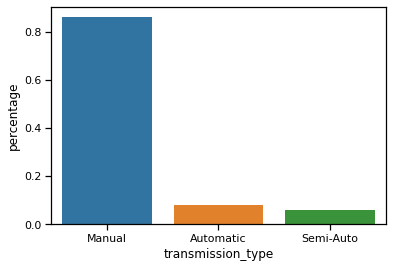

In [26]:
df_trans=df["transmission"].value_counts().to_frame().reset_index()
df_trans=df_trans.rename(columns={"index":"transmission_type", "transmission":"no_cars"})
df_trans["percentage"]=df_trans["no_cars"]/df.shape[0]
df_trans=df_trans.round(2)
sns.barplot(x="transmission_type", y="percentage", data=df_trans)

Bar plot is more suitable for increased number of variable compared to pie plot. 

#### create Scatter plot

<AxesSubplot:xlabel='price', ylabel='mpg'>

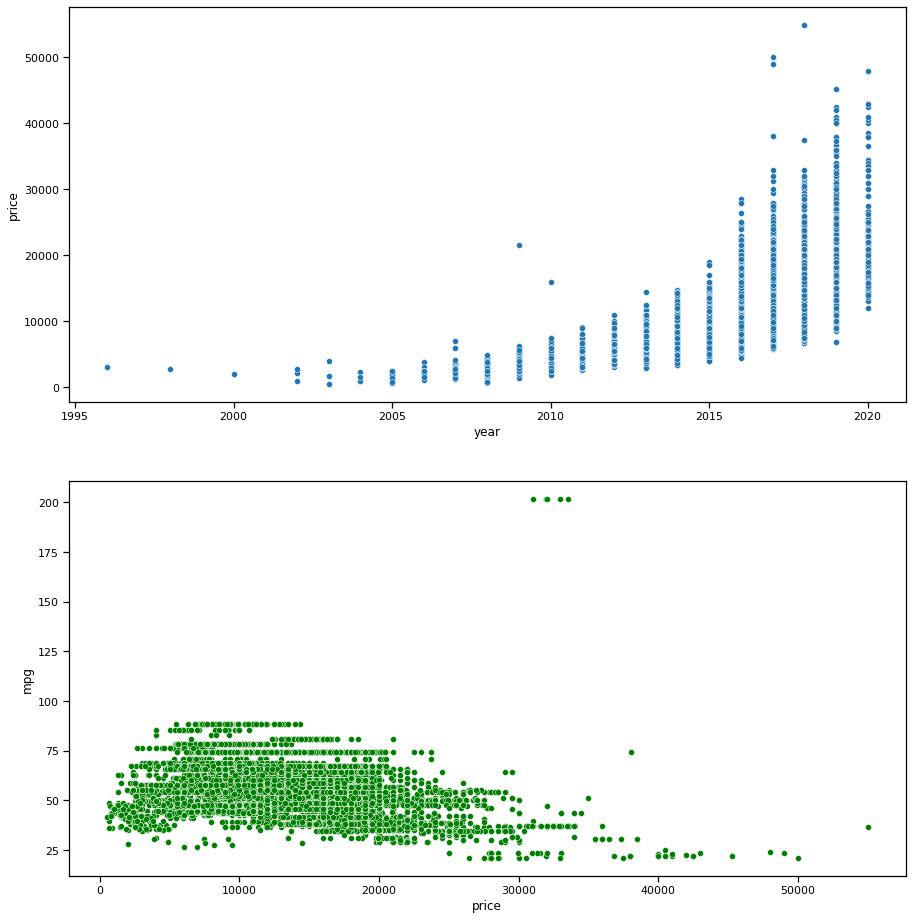

In [27]:
plt.figure(figsize = (15,16))
plt.subplot(2,1,1)
sns.scatterplot(x="year", y="price", data=df)
plt.subplot(2,1,2)
sns.scatterplot(x="price", y="mpg", data=df, color="green")

### Create Regression plot

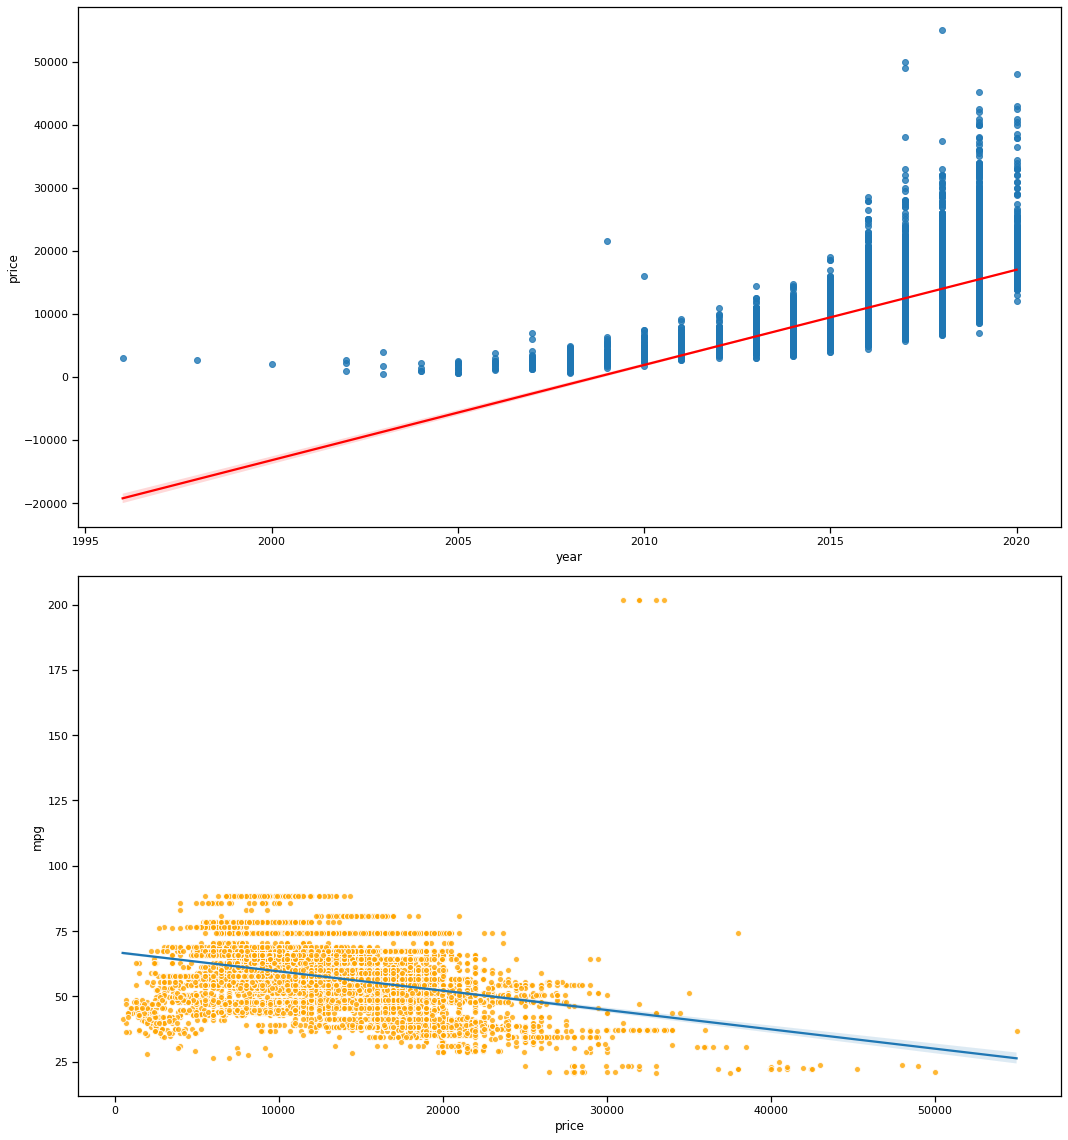

In [28]:
plt.figure(figsize = (15,16))
plt.subplot(2,1,1)
sns.regplot(x="year", y="price", data=df, line_kws={'color':"red"})
plt.subplot(2,1,2)
sns.regplot(x="price", y="mpg", data=df, scatter_kws={'color':'orange', 'edgecolor':'white'})
plt.tight_layout()
plt.show()

### Create Pair plot

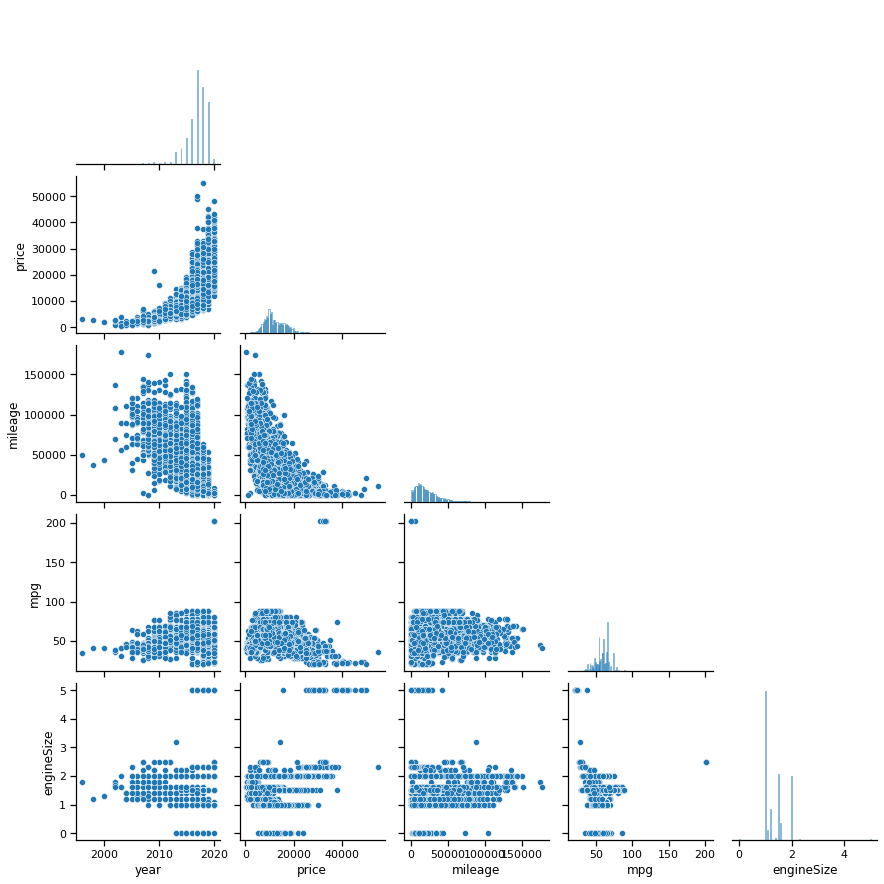

In [29]:
sns.pairplot(df, diag_kind="hist", diag_kws=dict(fill=False), corner=True)
plt.show()

#### Create Scatter plot using categorical variable

<AxesSubplot:xlabel='price', ylabel='mpg'>

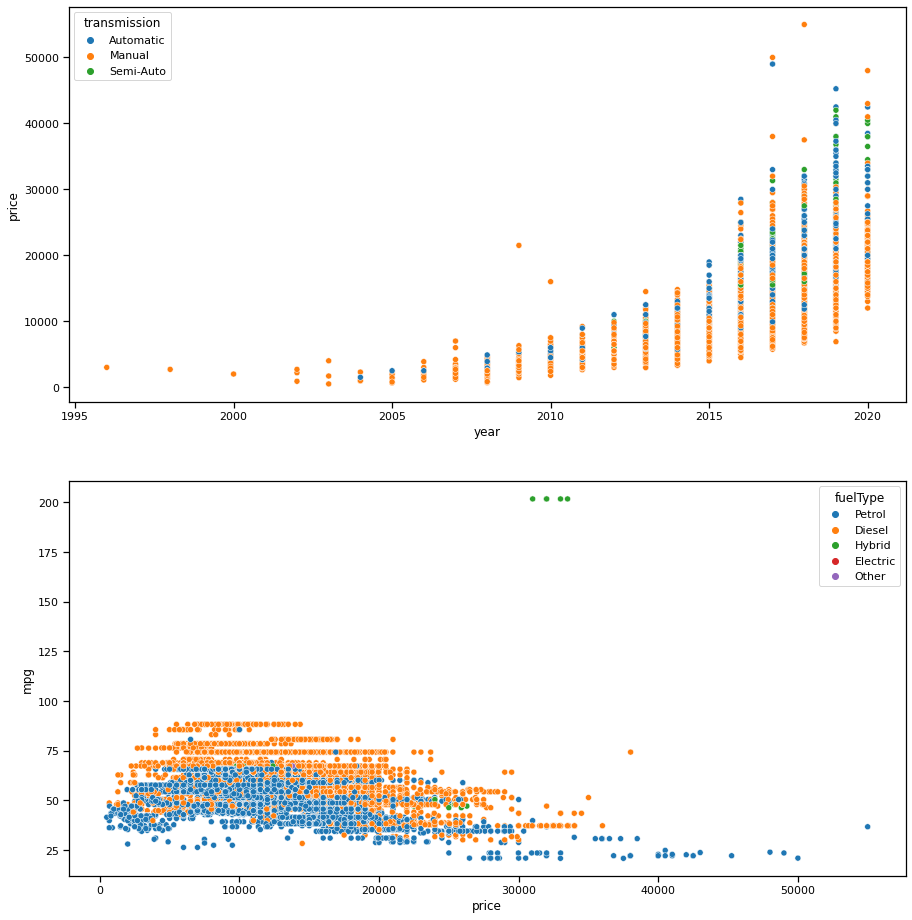

In [30]:
plt.figure(figsize = (15,16))
plt.subplot(2,1,1)
sns.scatterplot(x="year", y="price", data=df, hue="transmission")
plt.subplot(2,1,2)
sns.scatterplot(x="price", y="mpg", data=df, color="green", hue="fuelType")

### Create regression plot using categorical variable

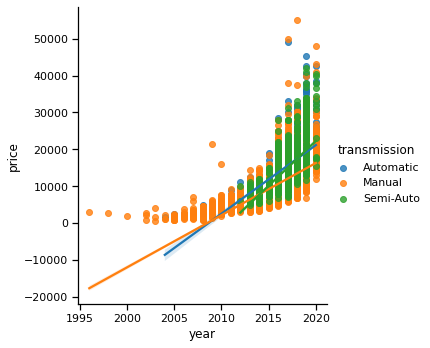

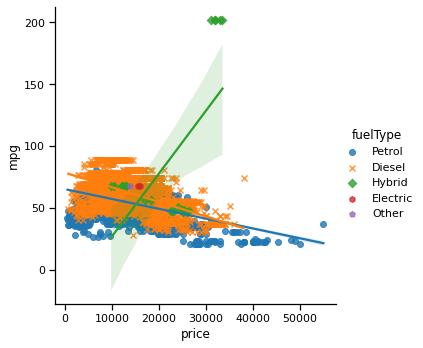

In [31]:

sns.lmplot(x="year", y="price", data=df, hue="transmission")

sns.lmplot(x="price", y="mpg", data=df, hue="fuelType", markers=["o", "x", "D", "h", "p"])
# plt.tight_layout()
plt.show()

### Create Pair plot using categorical variable

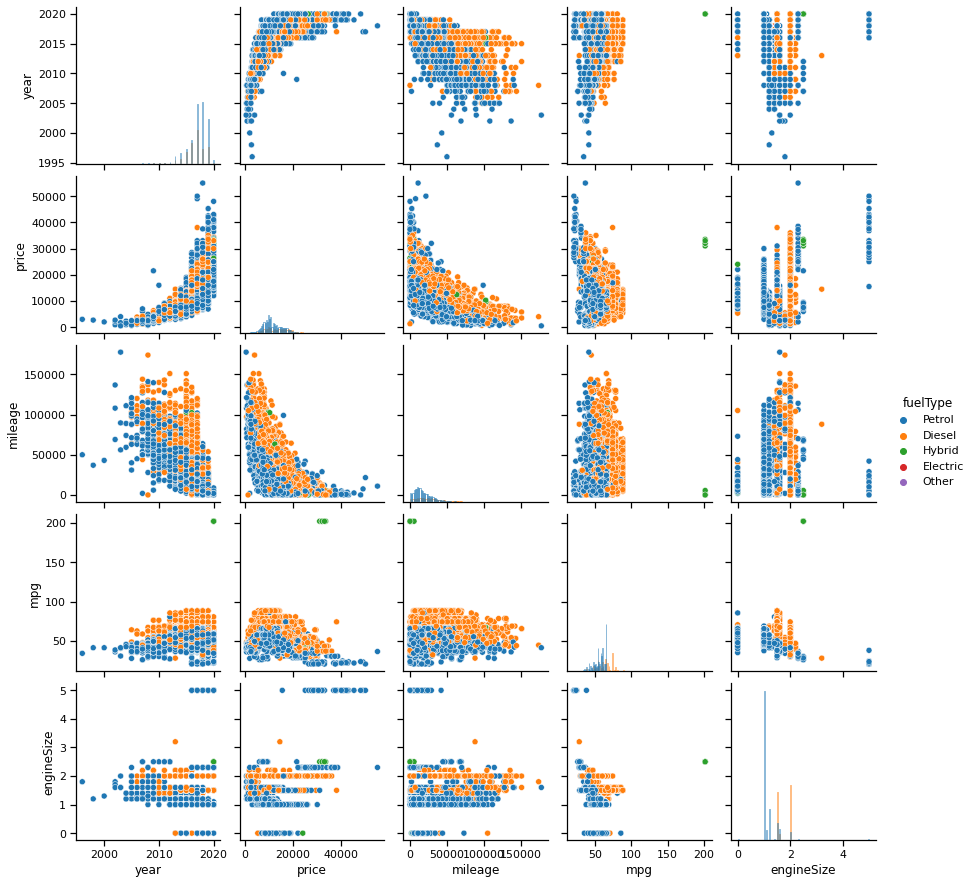

In [32]:
sns.pairplot(df, diag_kind="hist", diag_kws=dict(fill=False), hue="fuelType")
plt.show()

### create a boxplot for different categorical variable

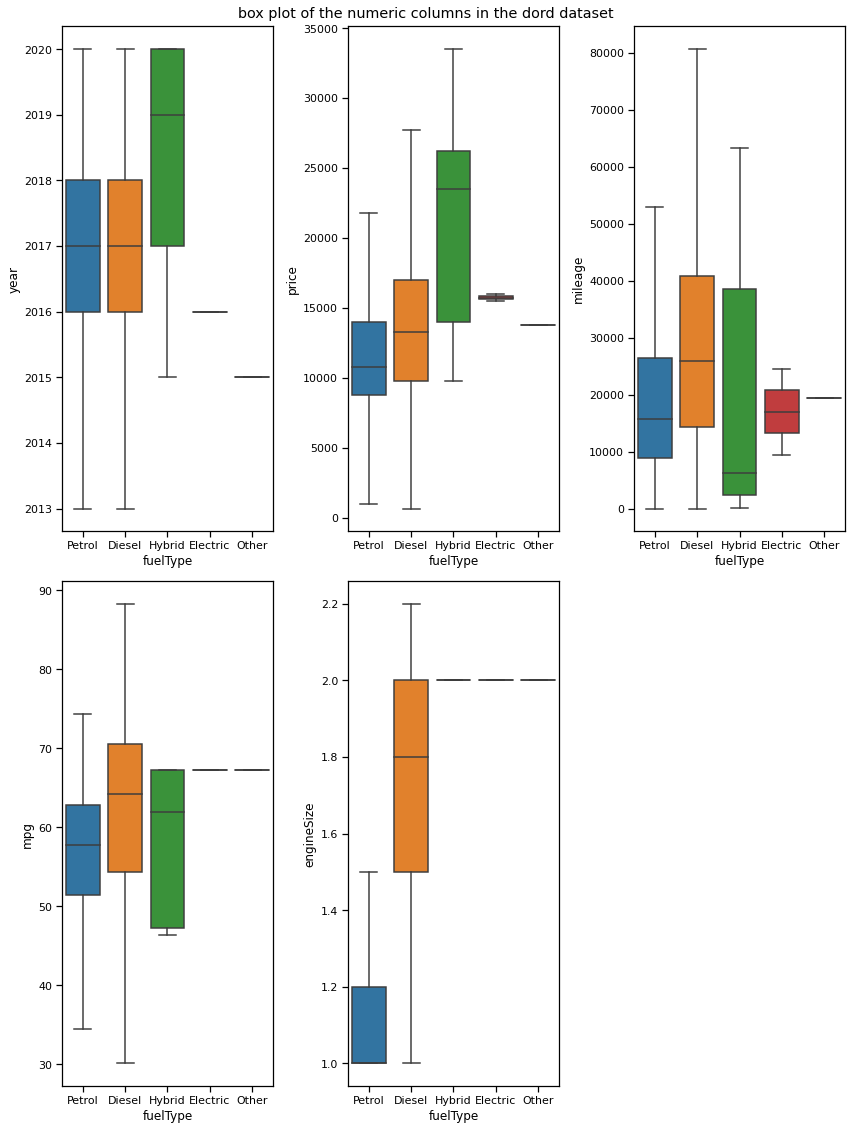

In [33]:
cl_list=[];
for col in df.columns:
    if df[col].dtype!='O':
        cl_list.append(col)
plt.figure(figsize=(12,16))
for c in range(len(cl_list)):
    plt.subplot(2,3,c+1)
    sns.boxplot(y=cl_list[c] , data=df, showfliers=False, x=df["fuelType"])
plt.suptitle("box plot of the numeric columns in the dord dataset")
plt.tight_layout()


### Create Violin plot for different categorical variable

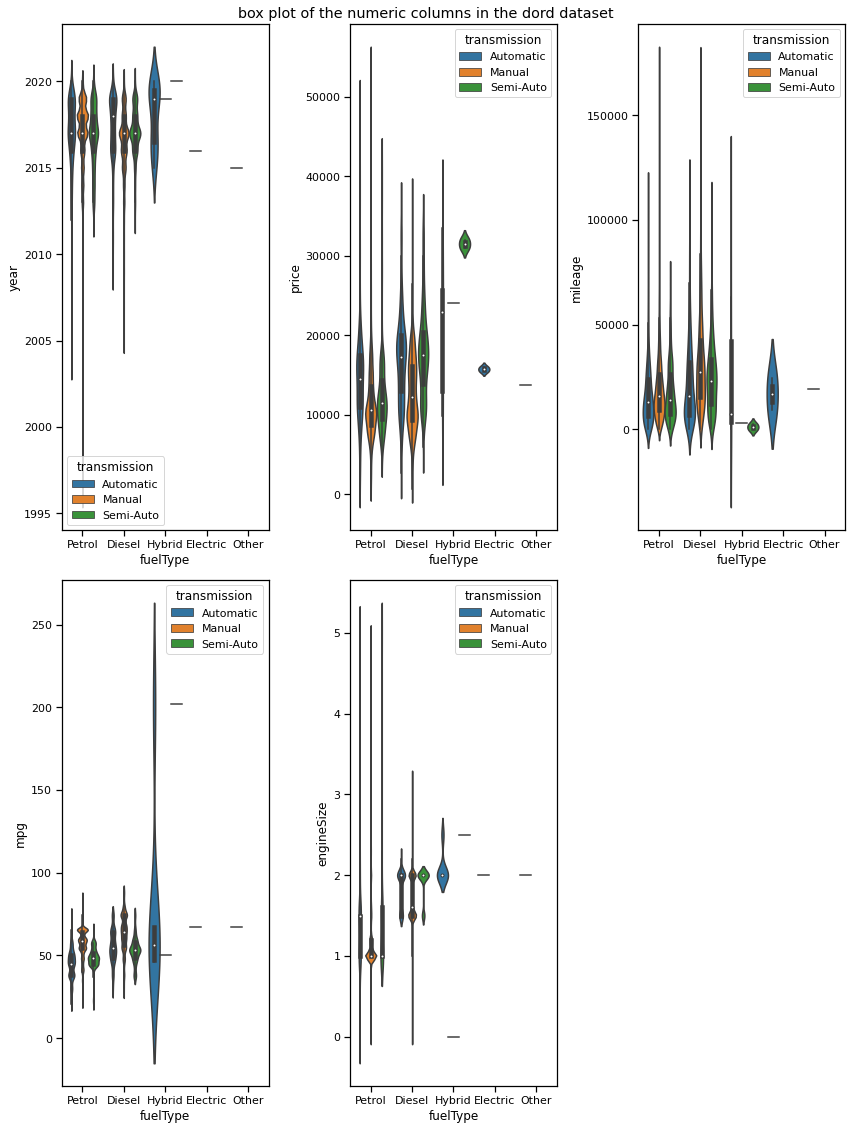

In [34]:
cl_list=[];
for col in df.columns:
    if df[col].dtype!='O':
        cl_list.append(col)
plt.figure(figsize=(12,16))
for c in range(len(cl_list)):
    plt.subplot(2,3,c+1)
    sns.violinplot(y=df[cl_list[c]] , x=df["fuelType"], hue=df["transmission"], showfliers=False)
plt.suptitle("box plot of the numeric columns in the dord dataset")
plt.tight_layout()